In [3]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Unicorn_Companies.csv to Unicorn_Companies.csv


In [5]:
df = pd.read_csv(io.StringIO(uploaded['Unicorn_Companies.csv'].decode('utf-8')))
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2


In [9]:
df["Amount"] = df["Total Raised"].str[-1]

df["Total Raised"] = df["Total Raised"].replace({"\$": "", "B$": "", "M$": "", "None": np.nan, "K$": ""}, regex=True)
df["Total Raised"] = df["Total Raised"].astype(float)

for i, row in df.iterrows():
    if row["Amount"] == "B":
        df.loc[i, "Total Raised"] = row["Total Raised"] * 1000000000
    elif row["Amount"] == "M":
        df.loc[i, "Total Raised"] = row["Total Raised"] * 1000000
    elif row["Amount"] == "K":
        df.loc[i, "Total Raised"] = row["Total Raised"] * 1000

df = df.drop("Amount", axis=1)

df["Valuation ($B)"] = df["Valuation ($B)"].replace({"\$": ""}, regex=True)
df["Valuation ($B)"] = df["Valuation ($B)"].astype(float)




,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,7.440000e+09,IPO,28,8,5
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,6.874000e+09,None,29,12,None
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,2.901000e+09,Asset,39,12,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,3.472000e+09,Acquired,56,13,1
4,Epic Games,42.0,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,4.377000e+09,Acquired,25,5,2


In [22]:
df["Country"] = df["Country"].astype('category')
df["City"] = df["City"].astype('category')
df["Industry"] = df["Industry"].astype('category')



In [12]:
df['Investors Count'].dtype

dtype('O')

In [18]:
df['Investors Count'].replace('None', np.nan, inplace=True)
#this method uses np.nan, which has a float dtype (e.g.: float64), as opposed to pandas's default dtype of object for a nan column
df["Investors Count"] = [float(str(i).replace(" ", "")) for i in df["Investors Count"]]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,7.440000e+09,IPO,28.0,8,5
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,6.874000e+09,None,29.0,12,None
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,2.901000e+09,Asset,39.0,12,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,3.472000e+09,Acquired,56.0,13,1
4,Epic Games,42.0,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,4.377000e+09,Acquired,25.0,5,2


In [20]:
#

df["Date Joined"] = pd.to_datetime(df["Date Joined"])
df[df["Founded Year"] == "None"] = None
df["Founded Year"] = pd.to_datetime(df["Founded Year"])

df['year'] = df['Date Joined'].dt.year





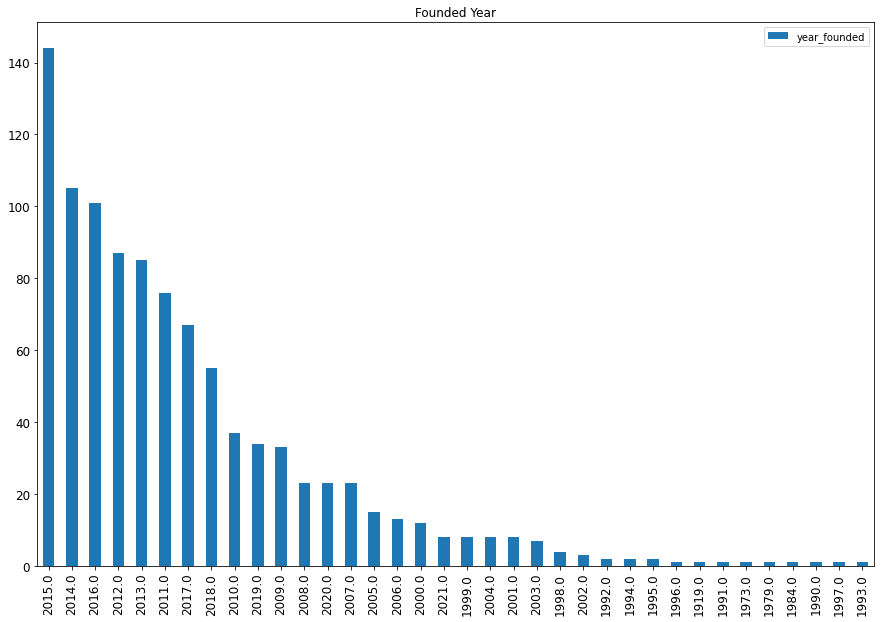

In [35]:
df['year_founded'] = df['Founded Year'].dt.year
year_founded = df['year_founded'].value_counts()
ax = year_founded.plot(kind='bar', title ="Founded Year", figsize=(15, 10), legend=True, fontsize=12)


Text(0.5, 1.0, 'Top 10 Companies')

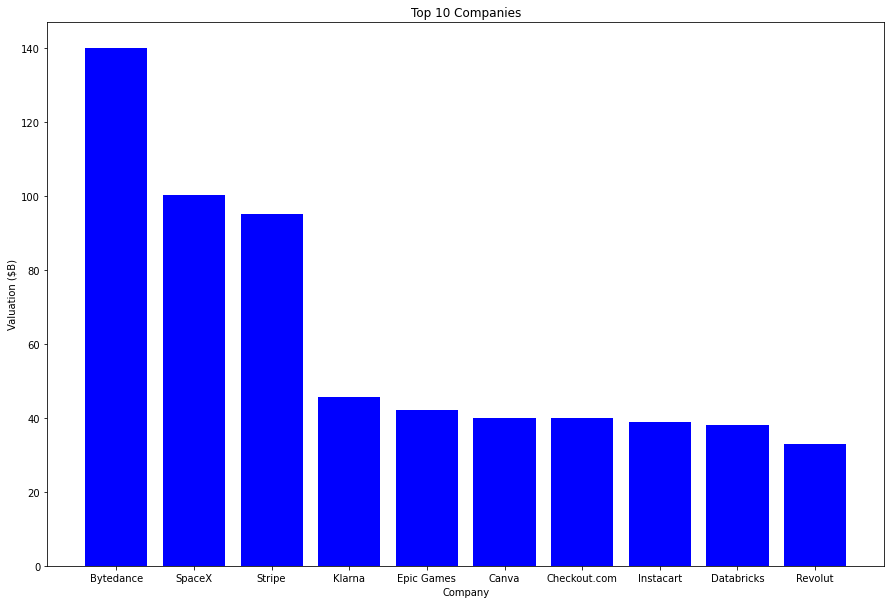

In [34]:
top_10 = df.sort_values("Valuation ($B)", ascending=False)[:10]
top_10['Company']

fig = plt.figure(figsize = (15, 10))

plt.bar(top_10['Company'], top_10['Valuation ($B)'], color ='blue')
 
plt.xlabel("Company")
plt.ylabel("Valuation ($B)")
plt.title("Top 10 Companies")

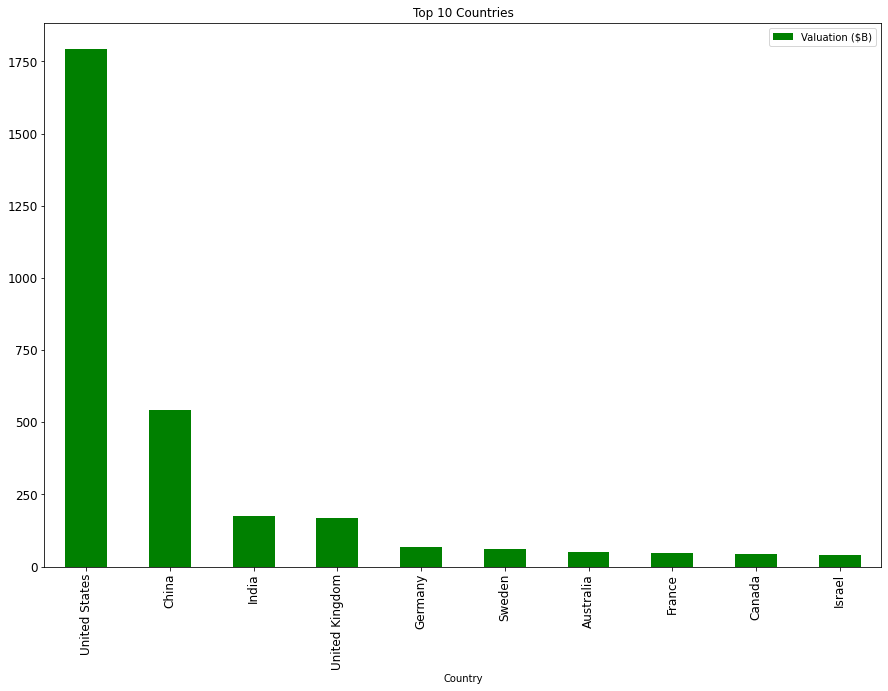

In [36]:
Country_df = df.groupby("Country")
top_10_Countries = Country_df['Valuation ($B)'].sum().sort_values(ascending=False)[:10]



ax = top_10_Countries.plot(kind='bar', title ="Top 10 Countries", figsize=(15, 10), legend=True, fontsize=12, color='green')


Text(0, 0.5, '')

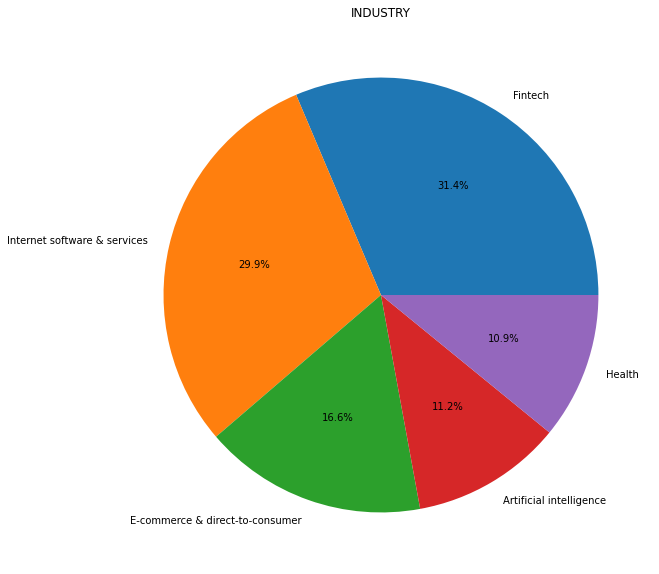

In [46]:
sum_industry = df['Industry'].value_counts()
top_5_industry = sum_industry.head()


fig = plt.figure(figsize = (15, 10))

top_5_industry.plot(kind='pie',autopct='%.1f%%')

plt.title("INDUSTRY")
plt.ylabel("")
#ax.pie(x, labels=labels, autopct='%.1f%%')